# Cluster cell numbers for the MEF dataset
#### Tam :
0 : 1711
<br>
1 : 487
<br>
2 : 479
<br>
3 : 120
<br>
4 : 658
<br>
5 : 229
<br>
6 : 428
<br>
7 : 52
<br>
8 : 76
<br>

#### Prol :
0 : 5555
<br>
1 : 3119
<br>
2 : 1960
<br>
3 : 1193
<br>
4 : 337
<br>
5 : 368
<br>
6 : 113
<br>
7 : 238
<br>
8 : 3

### 4, 6, 8 have higher cell numbers in the tamoxifen treated group compared to the proliferating control group

In [1]:
# basic imports
import os
import sys
import pandas as pd
import scanpy as sc
import numpy as np
import scipy as sp

In [3]:
# specific imports
import decoupler as dc
import gseapy as gp

### Load anndata object

a. read from h5ad for other modules


In [2]:
adata_path = "/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/mouse_fibro/MEFs_gene_silencing.h5ad"
adata = sc.read_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 17126 × 17052
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.2', 'integrated_snn_res.0.25', 'integrated_snn_res.0.3', 'integrated_snn_res.0.35', 'integrated_snn_res.0.5', 'seurat_clusters', 'old.ident', 'integrated_snn_res.0.4', 'integrated_snn_res.0.45', 'integrated_snn_res.0.55', 'integrated_snn_res.0.6', 'Treatment', 'cluster.treatment'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [3]:
print(adata.X.max())

7.751657790744364


In [4]:
# calculate neighbors and umap
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/ihome/djishnu/aks203/.conda/envs/senescence_v2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-02 17:16:20.403604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733177780.831353   14786 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733177780.941669   14786 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 17:16:21.910163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in p

<Axes: title={'center': 'integrated_snn_res.0.4'}, xlabel='UMAP1', ylabel='UMAP2'>

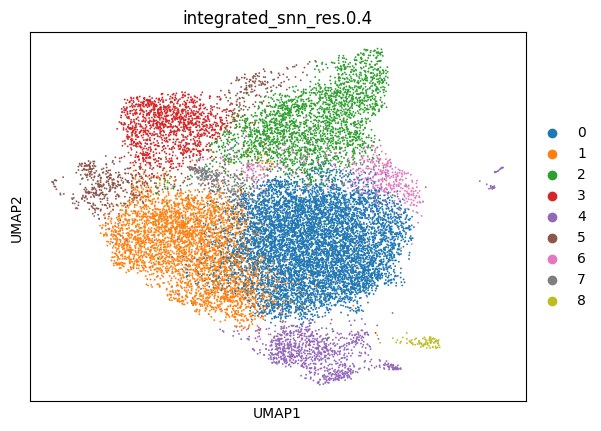

In [5]:
sc.pl.embedding(adata, basis="umap", color="integrated_snn_res.0.4", show=False)

In [6]:
# save adata
adata.write('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/MEFs_processed.h5ad')

b. making anndata object from counts; for dca and deepScence

In [23]:
# Convert sparse matrix to DataFrame
import pandas as pd
import scipy.sparse as sp

# If adata.X is sparse, convert to dense then DataFrame
if sp.issparse(adata_counts.X):
    counts_denoised = pd.DataFrame(
        adata_counts.X.toarray(),
        index=adata_counts.obs_names,
        columns=adata_counts.var_names
    )
else:
    counts_denoised = pd.DataFrame(
        adata_counts.X,
        index=adata_counts.obs_names,
        columns=adata_counts.var_names
    )

# Transpose and save
counts_denoised = counts_denoised.T
counts_denoised.to_csv('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/MEFs_counts_denoised_gene_by_cell.txt', sep='\t')

In [3]:
# load csv counts
counts = pd.read_csv('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/MEFs_counts_gene_by_cell.txt', sep = '\t').T

In [4]:
counts_df = counts
counts_df.columns = counts_df.iloc[0]
# Convert column names to strings first, then uppercase (will help with matching mouse genes to human orthologs)
counts_df.columns = [str(x).upper() for x in counts_df.columns]
counts_df = counts_df.iloc[1:]
counts_df.index.name = None
counts_df.columns.name = None

In [5]:
display(counts_df)

XKR4  RP1 SOX17 MRPL15 LYPLA1 TCEA1 RGS20  \
020624_Prol_AAACCCAAGATGAAGG-1  0.0  0.0   0.0    3.0    0.0   3.0   0.0   
020624_Prol_AAACCCAAGATTAGTG-1  0.0  0.0   0.0    6.0    0.0   2.0   0.0   
020624_Prol_AAACCCAAGGTCATCT-1  0.0  0.0   0.0    0.0    0.0   0.0   0.0   
020624_Prol_AAACCCACAAACCATC-1  0.0  0.0   0.0    0.0    0.0   2.0   0.0   
020624_Prol_AAACCCACAGACCAAG-1  0.0  0.0   0.0    6.0    1.0   6.0   0.0   
...                             ...  ...   ...    ...    ...   ...   ...   
020624_Tam_TTTGGTTCAGAAGCTG-1   0.0  0.0   0.0    3.0    0.0   6.0   0.0   
020624_Tam_TTTGGTTCATACCAGT-1   0.0  0.0   0.0    3.0    0.0   6.0   0.0   
020624_Tam_TTTGGTTGTGACCTGC-1   0.0  0.0   0.0    3.0    2.0   5.0   0.0   
020624_Tam_TTTGTTGTCCGAAGGA-1   0.0  0.0   0.0    2.0    1.0   4.0   1.0   
020624_Tam_TTTGTTGTCTGTCTCG-1   0.0  0.0   0.0    6.0    0.0  10.0   0.0   

                               ATP6V1H OPRK1 NPBWR1  ... UBA1Y KDM5D EIF2S3Y  \
020624_Prol_AAACCCAAGATGAAGG-1     0.0   0.0    0.0  ...   0.0   0.0     0.0   
020624_Prol_AAACCCAAGATTAGTG-1     1.0   0.0    0.0  ...   0.0   0.0     0.0   
020624_Prol_AAACCCAAGGTCATCT-1     0.0   0.0    0.0  ...   0.0   0.0     0.0   
020624_Prol_AAACCCACAAACCATC-1     3.0   0.0    0.0  ...   0.0   0.0     0.0   
020624_Prol_AAACCCACAGACCAAG-1     2.0   0.0    0.0  ...   0.0   0.0     0.0   
...                                ...   ...    ...  ...   ...   ...     ...   
020624_Tam_TTTGGTTCAGAAGCTG-1      0.0   0.0    0.0  ...   0.0   0.0     0.0   
020624_Tam_TTTGGTTCATACCAGT-1      3.0   0.0    0.0  ...   0.0   0.0     0.0   
020624_Tam_TTTGGTTGTGACCTGC-1      7.0   0.0    0.0  ...   0.0   0.0     0.0   
020624_Tam_TTTGTTGTCCGAAGGA-1      1.0   0.0    0.0  ...   0.0   0.0     0.0   
020624_Tam_TTTGTTGTCTGTCTCG-1      3.0   0.0    0.0  ...   0.0   0.0     0.0   

                                UTY DDX3Y USP9Y ZFY2 RBMY GM3376 GM20736  
020624_Prol_AAACCCAAGATGAAGG-1  0.0   0.0   0.0  0.0  0.0    0.0     0.0  
020624_Prol_AAACCCAAGATTAGTG-1  0.0   0.0   0.0  0.0  0.0    0.0     0.0  
020624_Prol_AAACCCAAGGTCATCT-1  0.0   0.0   0.0  0.0  0.0    0.0     0.0  
020624_Prol_AAACCCACAAACCATC-1  0.0   0.0   0.0  0.0  0.0    0.0     0.0  
020624_Prol_AAACCCACAGACCAAG-1  0.0   0.0   0.0  0.0  0.0    0.0     0.0  
...                             ...   ...   ...  ...  ...    ...     ...  
020624_Tam_TTTGGTTCAGAAGCTG-1   0.0   0.0   0.0  0.0  0.0    0.0     0.0  
020624_Tam_TTTGGTTCATACCAGT-1   0.0   0.0   0.0  0.0  0.0    0.0     0.0  
020624_Tam_TTTGGTTGTGACCTGC-1   0.0   0.0   0.0  0.0  0.0    0.0     0.0  
020624_Tam_TTTGTTGTCCGAAGGA-1   0.0   0.0   0.0  0.0  0.0    0.0     0.0  
020624_Tam_TTTGTTGTCTGTCTCG-1   0.0   0.0   0.0  0.0  0.0    0.0     0.0  

[17126 rows x 17052 columns]

In [6]:
adata_counts = sc.AnnData(counts_df)
adata_counts.obs['condition'] = [x.split('_')[1]=='Tam' for x in adata_counts.obs_names]

In [7]:
adata_counts

AnnData object with n_obs × n_vars = 17126 × 17052
    obs: 'condition'

In [8]:
display(adata_counts.obs['condition'])

020624_Prol_AAACCCAAGATGAAGG-1    False
020624_Prol_AAACCCAAGATTAGTG-1    False
020624_Prol_AAACCCAAGGTCATCT-1    False
020624_Prol_AAACCCACAAACCATC-1    False
020624_Prol_AAACCCACAGACCAAG-1    False
                                  ...  
020624_Tam_TTTGGTTCAGAAGCTG-1      True
020624_Tam_TTTGGTTCATACCAGT-1      True
020624_Tam_TTTGGTTGTGACCTGC-1      True
020624_Tam_TTTGTTGTCCGAAGGA-1      True
020624_Tam_TTTGTTGTCTGTCTCG-1      True
Name: condition, Length: 17126, dtype: bool

In [9]:
# Convert boolean condition to integer for plotting
adata_counts.obs['condition_int'] = adata_counts.obs['condition'].astype(int)

In [10]:
display(adata_counts.obs['condition_int'])

020624_Prol_AAACCCAAGATGAAGG-1    0
020624_Prol_AAACCCAAGATTAGTG-1    0
020624_Prol_AAACCCAAGGTCATCT-1    0
020624_Prol_AAACCCACAAACCATC-1    0
020624_Prol_AAACCCACAGACCAAG-1    0
                                 ..
020624_Tam_TTTGGTTCAGAAGCTG-1     1
020624_Tam_TTTGGTTCATACCAGT-1     1
020624_Tam_TTTGGTTGTGACCTGC-1     1
020624_Tam_TTTGTTGTCCGAAGGA-1     1
020624_Tam_TTTGTTGTCTGTCTCG-1     1
Name: condition_int, Length: 17126, dtype: int64

# Deepscence scoring of treated and control cells
DeepScence append 2 additional columns in `adata.obs` as the main results:\
    <br>
    `adata.obs["ds]` is the DeepScence score for each cell;\
    `adata.obs["binary]` is the binarized determination for SnCs (1=True) if user specify `binarize=True`.\


Perform denoising using DCA separately. Denoised expression matrix is stored in `adata.X` and specify `denoise = False`.

In [24]:
# ensure adata.X is set to raw counts
print(adata_counts.X.max())
print(adata_counts.X.min())

8613.174
4.5954621e-07


In [12]:
sc.pp.filter_genes(adata_counts, min_cells=1)
# coerce adata.X to dense
if sp.sparse.issparse(adata_counts.X):
    adata_counts.X = adata_counts.X.toarray()

In [14]:
# genes are filtered out if they are not expressed in any cell
adata_counts

AnnData object with n_obs × n_vars = 17126 × 16053
    obs: 'condition', 'condition_int'
    var: 'n_cells'

In [17]:
from dca.api import dca
dca(adata_counts, random_state=0)

dca: Successfully preprocessed 16053 genes and 17126 cells.


2024-12-02 15:39:08.713956: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-12-02 15:39:08.758746: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-12-02 15:39:08.796734: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA A100-PCIE-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.38GiB deviceMemoryBandwidth: 1.41TiB/s
2024-12-02 15:39:08.796889: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1

2024-12-02 15:39:09,150 [WARNING] From /ix/djishnu/Akanksha/senescence_clusters/dca_git/dca/train.py:41: The name tf.keras.backend.set_session is deprecated. Please use tf.compat.v1.keras.backend.set_session instead.

2024-12-02 15:39:09.151537: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 15:39:09.152336: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-12-02 15:39:09.155111: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA A100-PCIE-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.38GiB deviceMemoryBandwidth: 1.41TiB/s
2024-12-02 15:39:0

dca: Calculating reconstructions...


In [20]:
adata_counts

AnnData object with n_obs × n_vars = 17126 × 16053
    obs: 'condition', 'condition_int', 'dca_split', 'n_counts', 'size_factors'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

In [21]:
print(adata_counts.X.max())
print(adata_counts.X.min())


8613.174
4.5954621e-07


In [22]:
# save adata_counts
adata_counts.write('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/MEFs_counts_denoised.h5ad')

## Run DeepScence


In [2]:
adata_counts = sc.read_h5ad("/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/MEFs_counts_denoised.h5ad")

In [4]:
from DeepScence.api import DeepScence
adata_scored = DeepScence(adata_counts, binarize=True, denoise=False)
adata_scored


[2024-12-02 16:15] Input is preprocessed, preprocessed 16053 genes and 17126 cells.
[2024-12-02 16:15] Using 36 genes in the gene set for scoring
[2024-12-02 16:15] Lambda provided, capturing scores in 2 neurons.
[2024-12-02 16:15] Training on 15414 cells, validate on 1712 cells.
[2024-12-02 16:16] Binarizing with permutation...
100%|██████████| 50/50 [04:26<00:00,  5.33s/it]


AnnData object with n_obs × n_vars = 17126 × 16053
    obs: 'condition', 'condition_int', 'dca_split', 'n_counts', 'size_factors', 'ds', 'p', 'cluster', 'binary'
    var: 'n_cells', 'mean', 'std'
    uns: 'log'
    obsm: 'CDKN1A', 'scores_perm_mean'

In [5]:
# save as pandas the obs ds and binary columns
ds_df = adata_scored.obs[['ds', 'binary']]
ds_df.to_csv('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/MEFs_DeepScence_scores.txt', sep = '\t')


# SenCID (SVM models trained on human genesets of 6 different signatures of senescence)

In [ ]:
import pandas as pd
import scipy.sparse as sp
from SenCID.api import SenCID

In [ ]:
pred_dict, recSID, tmpfiles = SenCID(adata = adata, 
                    sidnums = [1,2,3,4,5,6], 
                    denoising = True, 
                    binarize = True, 
                    threads = 1, 
                    savetmp = True)

In [ ]:
# save pred_dict dictionary
import pickle
with open('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/tam_SenCID_pred_dict.pkl', 'wb') as f:
    pickle.dump(pred_dict, f)


In [ ]:
adata.obs = pd.concat([adata.obs, recSID.loc[adata.obs_names, :]], axis = 1)

In [ ]:
# save adata
adata.write('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/tam_SenCID.h5ad')

# Senescence geneset scoring (Mouse genes)
#### Curate geneset pandas dataframes (with genesymbols) from gmt files downloaded from gsea website
#### Run AUCell (upregulation of the geneset)


In [19]:
from pathlib import Path
def gmt_to_decoupler(pth: Path) -> pd.DataFrame:
    """
    Parse a gmt file to a decoupler pathway dataframe.
    """
    from itertools import chain, repeat

    pathways = {}

    with Path(pth).open("r") as f:
        for line in f:
            name, _, *genes = line.strip().split("\t")
            pathways[name] = genes

    return pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )

In [20]:
SenMayo = gmt_to_decoupler("/ix/djishnu/Akanksha/datasets/gene_sets/mouse/SAUL_SEN_MAYO.v2024.1.Mm.gmt")
ReplicativeSenescence = gmt_to_decoupler("/ix/djishnu/Akanksha/datasets/gene_sets/mouse/GOBP_REPLICATIVE_SENESCENCE.v2024.1.Mm.gmt")
TelomereSenescence = gmt_to_decoupler("/ix/djishnu/Akanksha/datasets/gene_sets/mouse/REACTOME_DNA_DAMAGE_TELOMERE_STRESS_INDUCED_SENESCENCE.v2024.1.Mm.gmt")
HFSenescence = gmt_to_decoupler("/ix/djishnu/Akanksha/datasets/gene_sets/mouse/REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HETEROCHROMATIN_FOCI_SAHF.v2024.1.Mm.gmt")


In [21]:
#append all genesets into one dataframe
sen_genesets = pd.concat([SenMayo, ReplicativeSenescence, TelomereSenescence, HFSenescence])
sen_genesets

geneset genesymbol
0                                       SAUL_SEN_MAYO     Acvr1b
1                                       SAUL_SEN_MAYO        Ang
2                                       SAUL_SEN_MAYO     Angpt1
3                                       SAUL_SEN_MAYO    Angptl4
4                                       SAUL_SEN_MAYO       Areg
..                                                ...        ...
11  REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HE...      Hmga2
12  REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HE...      Lmnb1
13  REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HE...        Rb1
14  REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HE...      Trp53
15  REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HE...       Ubn1

[230 rows x 2 columns]

In [ ]:
%%time
dc.run_aucell(
    adata,
    sen_genesets,
    source="geneset",
    target="genesymbol",
    use_raw=False,
)

In [ ]:
# Run AUCell for NIA_sen_mouse geneset
dc.run_aucell(
    adata,
    NIA_sen_geneset,
    source="geneset",
    target="genesymbol",
    use_raw=False,
)

In [19]:
# save adata (rewrite)
adata.write('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/tam_processed_MEFs.h5ad')


# Visualize all senescence scores


## Create one adata with all senescence scores appended
#### Can downsample cells in prol to match tam for visualization and statistics calculations

In [21]:
adata = sc.read_h5ad('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/mouse_fibro/MEFs_processed.h5ad')

In [22]:
adata

AnnData object with n_obs × n_vars = 17126 × 17052
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.2', 'integrated_snn_res.0.25', 'integrated_snn_res.0.3', 'integrated_snn_res.0.35', 'integrated_snn_res.0.5', 'seurat_clusters', 'old.ident', 'integrated_snn_res.0.4', 'integrated_snn_res.0.45', 'integrated_snn_res.0.55', 'integrated_snn_res.0.6', 'Treatment', 'cluster.treatment'
    uns: 'integrated_snn_res.0.4_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [17]:
# read obs of adata_scored
obs_scored = pd.read_csv('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/mouse_fibro/MEFs_DeepScence_scores.txt', sep = '\t')
display(obs_scored)


Unnamed: 0        ds  binary
0      020624_Prol_AAACCCAAGATGAAGG-1 -0.648627       0
1      020624_Prol_AAACCCAAGATTAGTG-1 -1.611665       0
2      020624_Prol_AAACCCAAGGTCATCT-1 -1.145400       0
3      020624_Prol_AAACCCACAAACCATC-1  0.188017       1
4      020624_Prol_AAACCCACAGACCAAG-1 -0.761007       0
...                               ...       ...     ...
17121   020624_Tam_TTTGGTTCAGAAGCTG-1 -0.114799       1
17122   020624_Tam_TTTGGTTCATACCAGT-1 -0.836613       0
17123   020624_Tam_TTTGGTTGTGACCTGC-1  0.156487       1
17124   020624_Tam_TTTGTTGTCCGAAGGA-1  0.057534       1
17125   020624_Tam_TTTGTTGTCTGTCTCG-1  0.159368       1

[17126 rows x 3 columns]

In [24]:
# add the ds and binary columns to adata.obs
obs_scored = obs_scored.set_index('Unnamed: 0')  # this is the column with cell names
adata.obs['ds'] = obs_scored['ds']
adata.obs['binary'] = obs_scored['binary']


In [25]:
adata

AnnData object with n_obs × n_vars = 17126 × 17052
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.2', 'integrated_snn_res.0.25', 'integrated_snn_res.0.3', 'integrated_snn_res.0.35', 'integrated_snn_res.0.5', 'seurat_clusters', 'old.ident', 'integrated_snn_res.0.4', 'integrated_snn_res.0.45', 'integrated_snn_res.0.55', 'integrated_snn_res.0.6', 'Treatment', 'cluster.treatment', 'ds', 'binary'
    uns: 'integrated_snn_res.0.4_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_tamxoifen = adata[adata.obs['Treatment'] == 'Tam']
adata_control = adata[adata.obs['Treatment'] == 'Prol']


In [33]:
adata_tamxoifen

View of AnnData object with n_obs × n_vars = 4240 × 17052
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.2', 'integrated_snn_res.0.25', 'integrated_snn_res.0.3', 'integrated_snn_res.0.35', 'integrated_snn_res.0.5', 'seurat_clusters', 'old.ident', 'integrated_snn_res.0.4', 'integrated_snn_res.0.45', 'integrated_snn_res.0.55', 'integrated_snn_res.0.6', 'Treatment', 'cluster.treatment', 'ds', 'binary'
    uns: 'integrated_snn_res.0.4_colors', 'neighbors', 'pca', 'umap', 'Treatment_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [34]:
adata_control

View of AnnData object with n_obs × n_vars = 12886 × 17052
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.2', 'integrated_snn_res.0.25', 'integrated_snn_res.0.3', 'integrated_snn_res.0.35', 'integrated_snn_res.0.5', 'seurat_clusters', 'old.ident', 'integrated_snn_res.0.4', 'integrated_snn_res.0.45', 'integrated_snn_res.0.55', 'integrated_snn_res.0.6', 'Treatment', 'cluster.treatment', 'ds', 'binary'
    uns: 'integrated_snn_res.0.4_colors', 'neighbors', 'pca', 'umap', 'Treatment_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

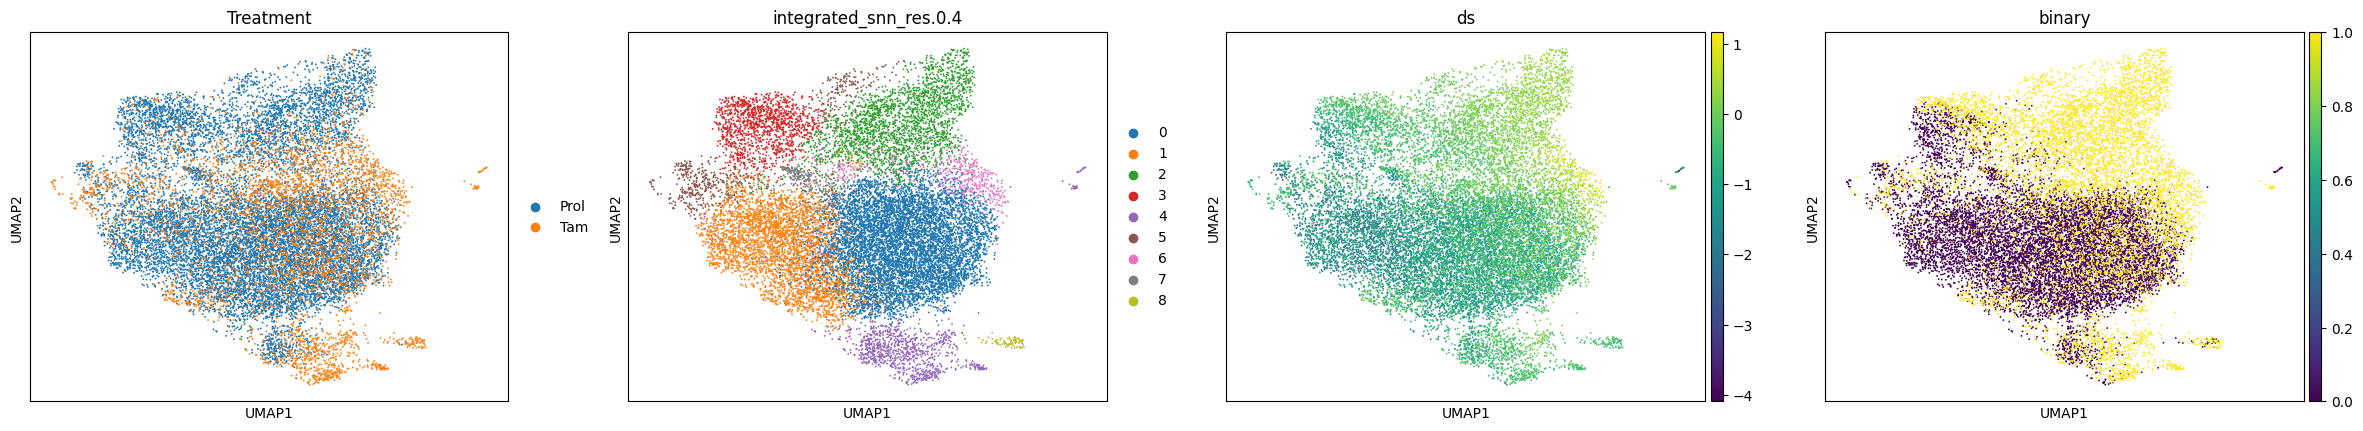

In [26]:
sc.pl.umap(adata, color = ['Treatment','integrated_snn_res.0.4','ds', 'binary'], color_map = 'viridis')

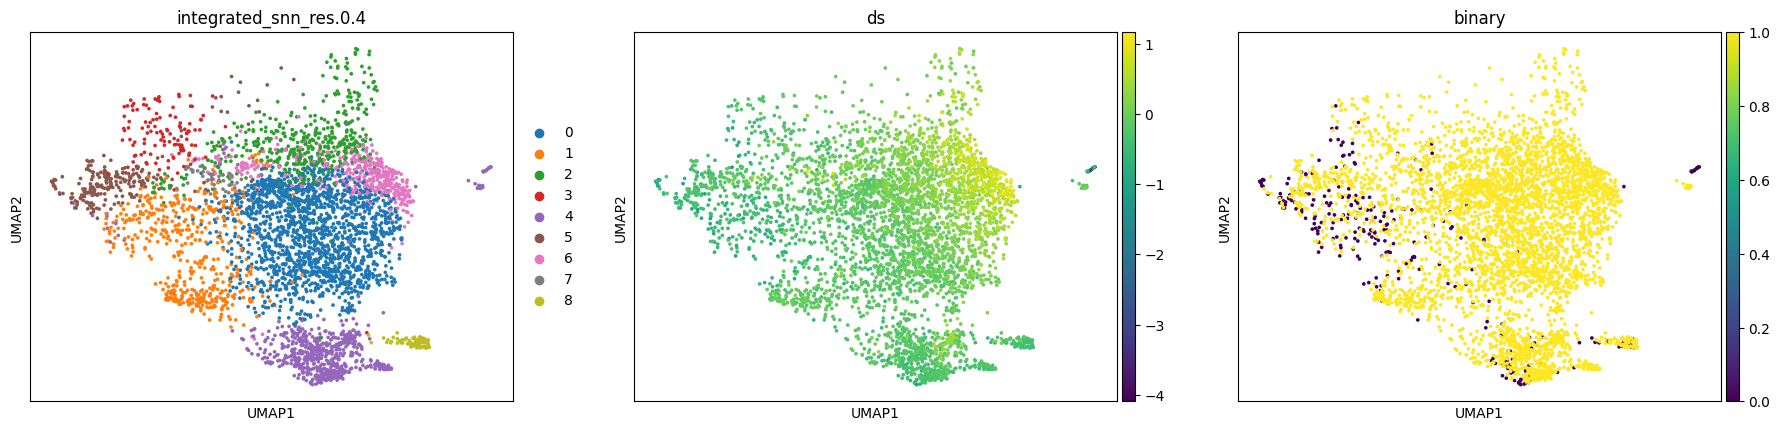

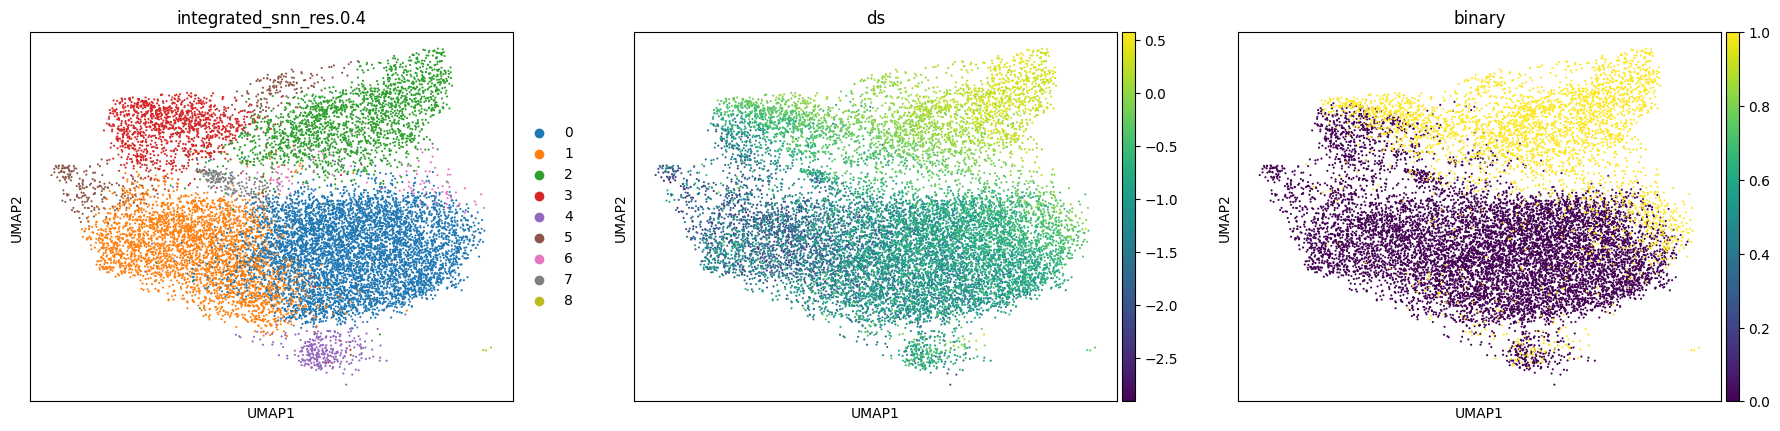

In [47]:

sc.pl.umap(adata_tamxoifen, color = ['integrated_snn_res.0.4','ds', 'binary'], color_map = 'viridis')
sc.pl.umap(adata_control, color = ['integrated_snn_res.0.4','ds', 'binary'], color_map = 'viridis')


#### Violin plot of deepscence scores per cell cluster

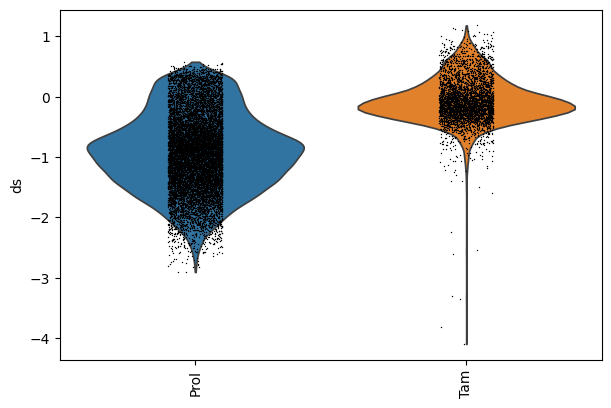

In [27]:
# violin plot of ds scores per cell cluster calculated seperately for treated and control cells
sc.pl.violin(adata, keys = ['ds'], groupby = 'Treatment', rotation = 90)


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.multitest import multipletests

def add_stat_annotation(x1, x2, y, h, p_adj):
    """Add significance annotation to plot"""
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    if p_adj < 0.001:
        stars = '***'
    elif p_adj < 0.01:
        stars = '**'
    elif p_adj < 0.05:
        stars = '*'
    else:
        stars = 'ns'
    plt.text((x1+x2)*.5, y+h, stars, ha='center', va='bottom')

In [31]:
# Get data for tamoxifen and proliferating cells
tam_data = adata_tamxoifen.obs[['ds', 'integrated_snn_res.0.4']].assign(Treatment='Tam')
prol_data = adata_control.obs[['ds', 'integrated_snn_res.0.4']].assign(Treatment='Prol')

# Combine the data
plot_data = pd.concat([tam_data, prol_data])

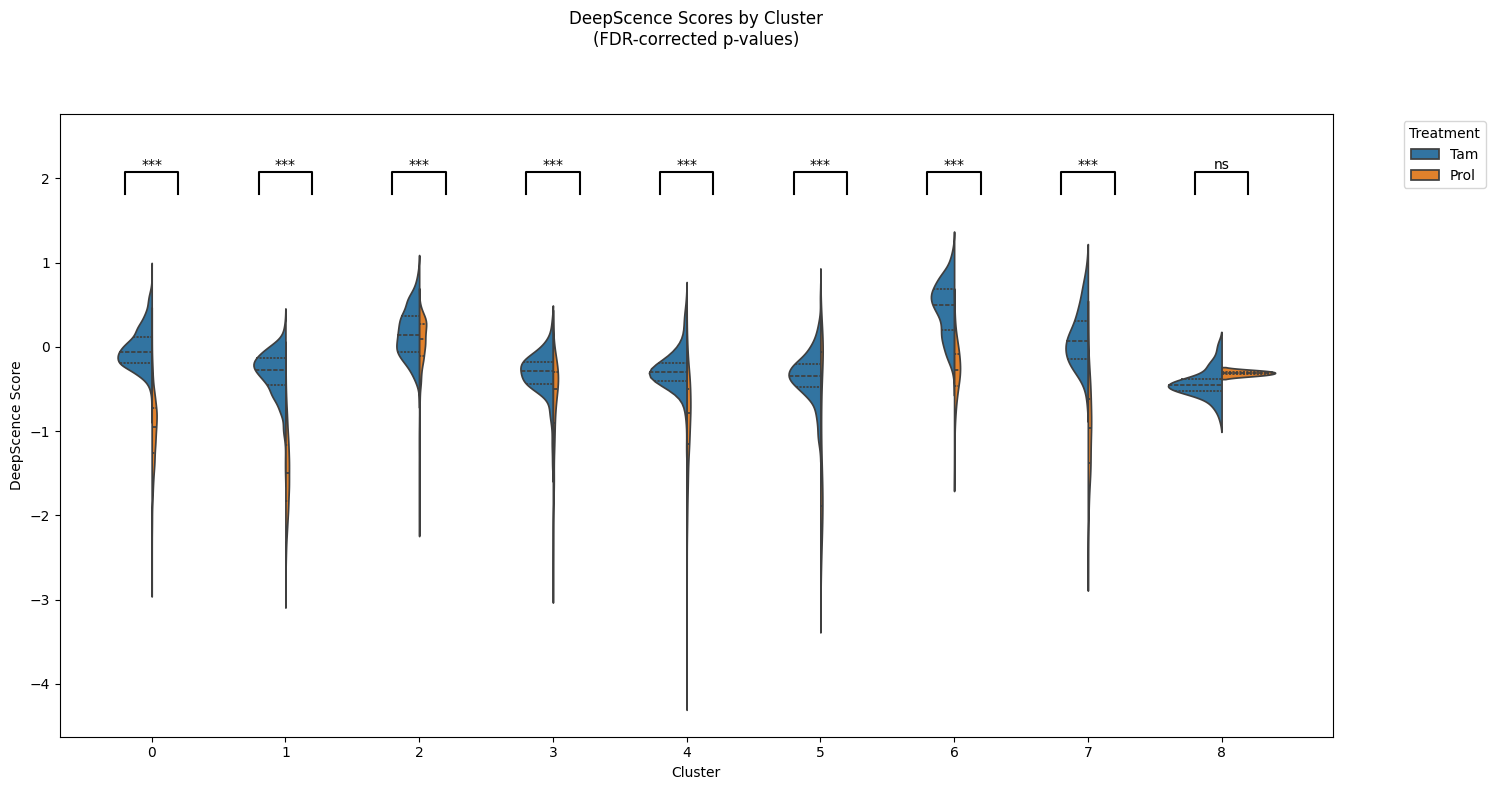

In [29]:
# Create the plot
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=0.85)

# Create violin plot
sns.violinplot(data=plot_data, 
              x='integrated_snn_res.0.4',  
              y='ds',                   
              hue='Treatment',             
              split=True,
              inner='quartile')

# Prepare for statistical testing
clusters = sorted(plot_data['integrated_snn_res.0.4'].unique())
max_y = plot_data['ds'].max()
min_y = plot_data['ds'].min()
y_range = max_y - min_y
spacing = y_range * 0.1

# Collect all p-values first
p_values = []
cluster_pairs = []

for cluster in clusters:
    cluster_tam = tam_data[tam_data['integrated_snn_res.0.4'] == cluster]['ds']
    cluster_prol = prol_data[prol_data['integrated_snn_res.0.4'] == cluster]['ds']
    
    # Perform t-test
    stat, p_val = stats.ttest_ind(cluster_tam, cluster_prol)
    p_values.append(p_val)
    cluster_pairs.append((cluster_tam, cluster_prol))

# Correct for multiple testing using Benjamini-Hochberg method
rejected, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')

# Add annotations with adjusted p-values
for idx, (p_adj, cluster) in enumerate(zip(p_adjusted, clusters)):
    y_pos = max_y + spacing * (1.2)
    add_stat_annotation(idx-0.2, idx+0.2, y_pos, spacing*0.5, p_adj)

# Customize the plot
plt.title('DeepScence Scores by Cluster\n(FDR-corrected p-values)', pad=50)
plt.xlabel('Cluster')
plt.ylabel('DeepScence Score')
plt.xticks(rotation=0)

# Adjust y-axis limits
plt.ylim(min_y - (y_range * 0.1), max_y + (spacing * 3))

# Add legend
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

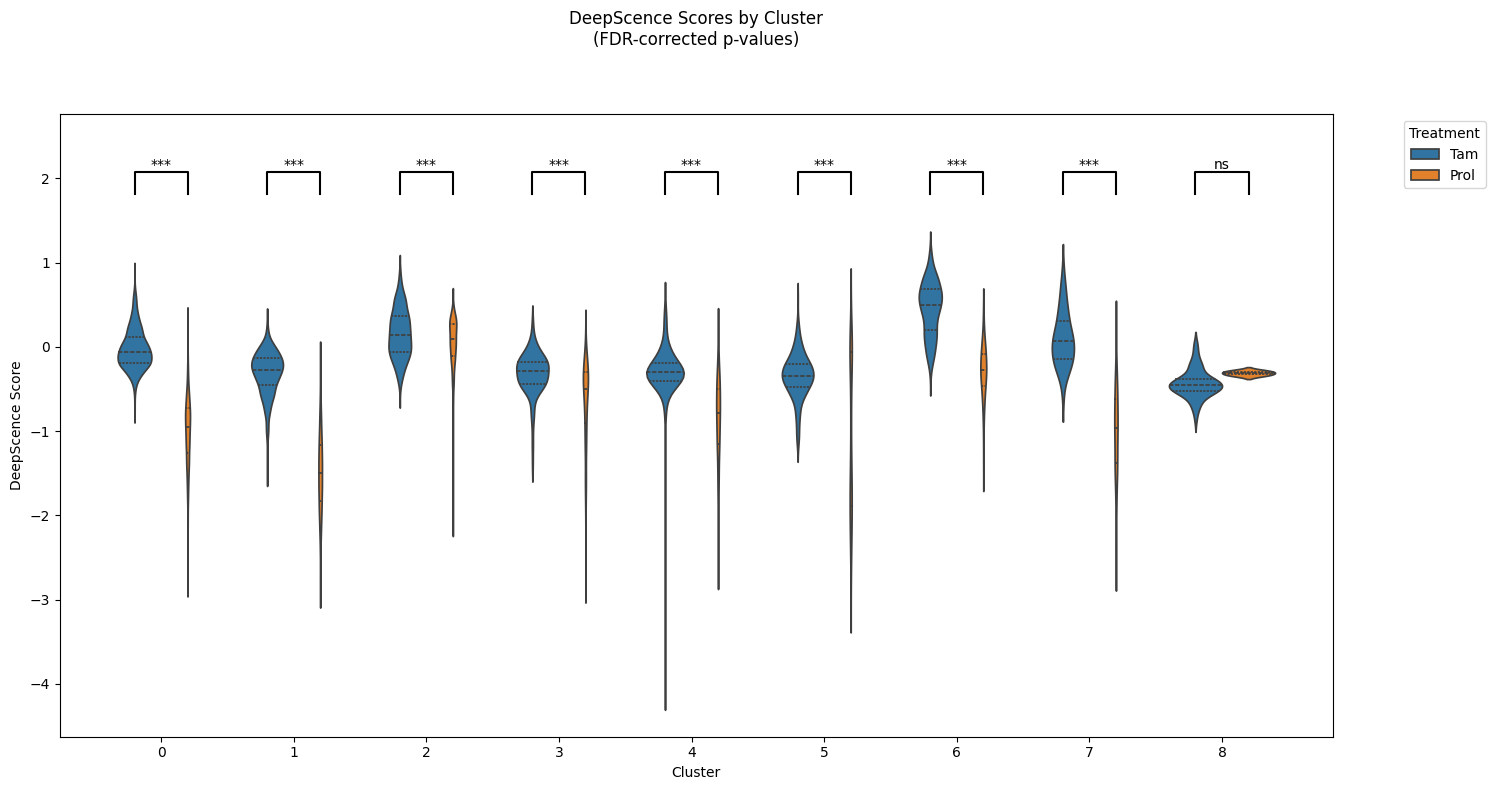

In [32]:
# Create the plot
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=0.85)

# Create violin plot - note removed split=True and adjusted x parameter
sns.violinplot(data=plot_data, 
              x='integrated_snn_res.0.4',  
              y='ds',                   
              hue='Treatment',             
              inner='quartile')

# Prepare for statistical testing
clusters = sorted(plot_data['integrated_snn_res.0.4'].unique())
max_y = plot_data['ds'].max()
min_y = plot_data['ds'].min()
y_range = max_y - min_y
spacing = y_range * 0.1

# Collect all p-values first
p_values = []
cluster_pairs = []

for idx, cluster in enumerate(clusters):
    cluster_tam = tam_data[tam_data['integrated_snn_res.0.4'] == cluster]['ds']
    cluster_prol = prol_data[prol_data['integrated_snn_res.0.4'] == cluster]['ds']
    
    # Perform t-test
    stat, p_val = stats.ttest_ind(cluster_tam, cluster_prol)
    p_values.append(p_val)
    cluster_pairs.append((cluster_tam, cluster_prol))
    
    # Adjust x-coordinates for side-by-side violins
    x1 = idx - 0.2  # Position of first violin in pair
    x2 = idx + 0.2  # Position of second violin in pair
    
    # Add statistical annotation
    y_pos = max_y + spacing * (1.2)
    add_stat_annotation(x1, x2, y_pos, spacing*0.5, p_val)

# Correct for multiple testing using Benjamini-Hochberg method
rejected, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')

# Customize the plot
plt.title('DeepScence Scores by Cluster\n(FDR-corrected p-values)', pad=50)
plt.xlabel('Cluster')
plt.ylabel('DeepScence Score')
plt.xticks(rotation=0)

# Adjust y-axis limits
plt.ylim(min_y - (y_range * 0.1), max_y + (spacing * 3))

# Add legend
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [44]:
# Calculate percentage of senescent cells per cluster for tamoxifen treated cells
cluster_percentages_tam = (adata_tamxoifen.obs
    .groupby('integrated_snn_res.0.4')
    .agg({
        'binary': ['count', 'sum']
    })
)
cluster_percentages_tam['percent_senescent'] = (cluster_percentages_tam['binary']['sum'] / 
                                              cluster_percentages_tam['binary']['count'] * 100)

# Calculate percentage of senescent cells per cluster for proliferating control cells
cluster_percentages_prol = (adata_control.obs
    .groupby('integrated_snn_res.0.4')
    .agg({
        'binary': ['count', 'sum']
    })
)
cluster_percentages_prol['percent_senescent'] = (cluster_percentages_prol['binary']['sum'] / 
                                               cluster_percentages_prol['binary']['count'] * 100)

# Display results
print("Tamoxifen treated cells - % senescent cells per cluster:")
print(cluster_percentages_tam['percent_senescent'].round(2))
print("\nProliferating control cells - % senescent cells per cluster:")
print(cluster_percentages_prol['percent_senescent'].round(2))


Tamoxifen treated cells - % senescent cells per cluster:
integrated_snn_res.0.4
0     99.12
1     77.82
2     99.79
3     85.00
4     88.60
5     78.17
6    100.00
7     98.08
8     67.11
Name: percent_senescent, dtype: float64

Proliferating control cells - % senescent cells per cluster:
integrated_snn_res.0.4
0      8.46
1      1.51
2     96.33
3     49.62
4     25.22
5     39.95
6     76.99
7     17.65
8    100.00
Name: percent_senescent, dtype: float64


/tmp/ipykernel_14786/1600492790.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('integrated_snn_res.0.4')
/tmp/ipykernel_14786/1600492790.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('integrated_snn_res.0.4')


In [6]:
sen_pathways = ["SAUL_SEN_MAYO", "GOBP_REPLICATIVE_SENESCENCE", "REACTOME_DNA_DAMAGE_TELOMERE_STRESS_INDUCED_SENESCENCE", "REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HETEROCHROMATIN_FOCI_SAHF"]
adata.obs[sen_pathways] = adata.obsm["aucell_estimate"][sen_pathways]

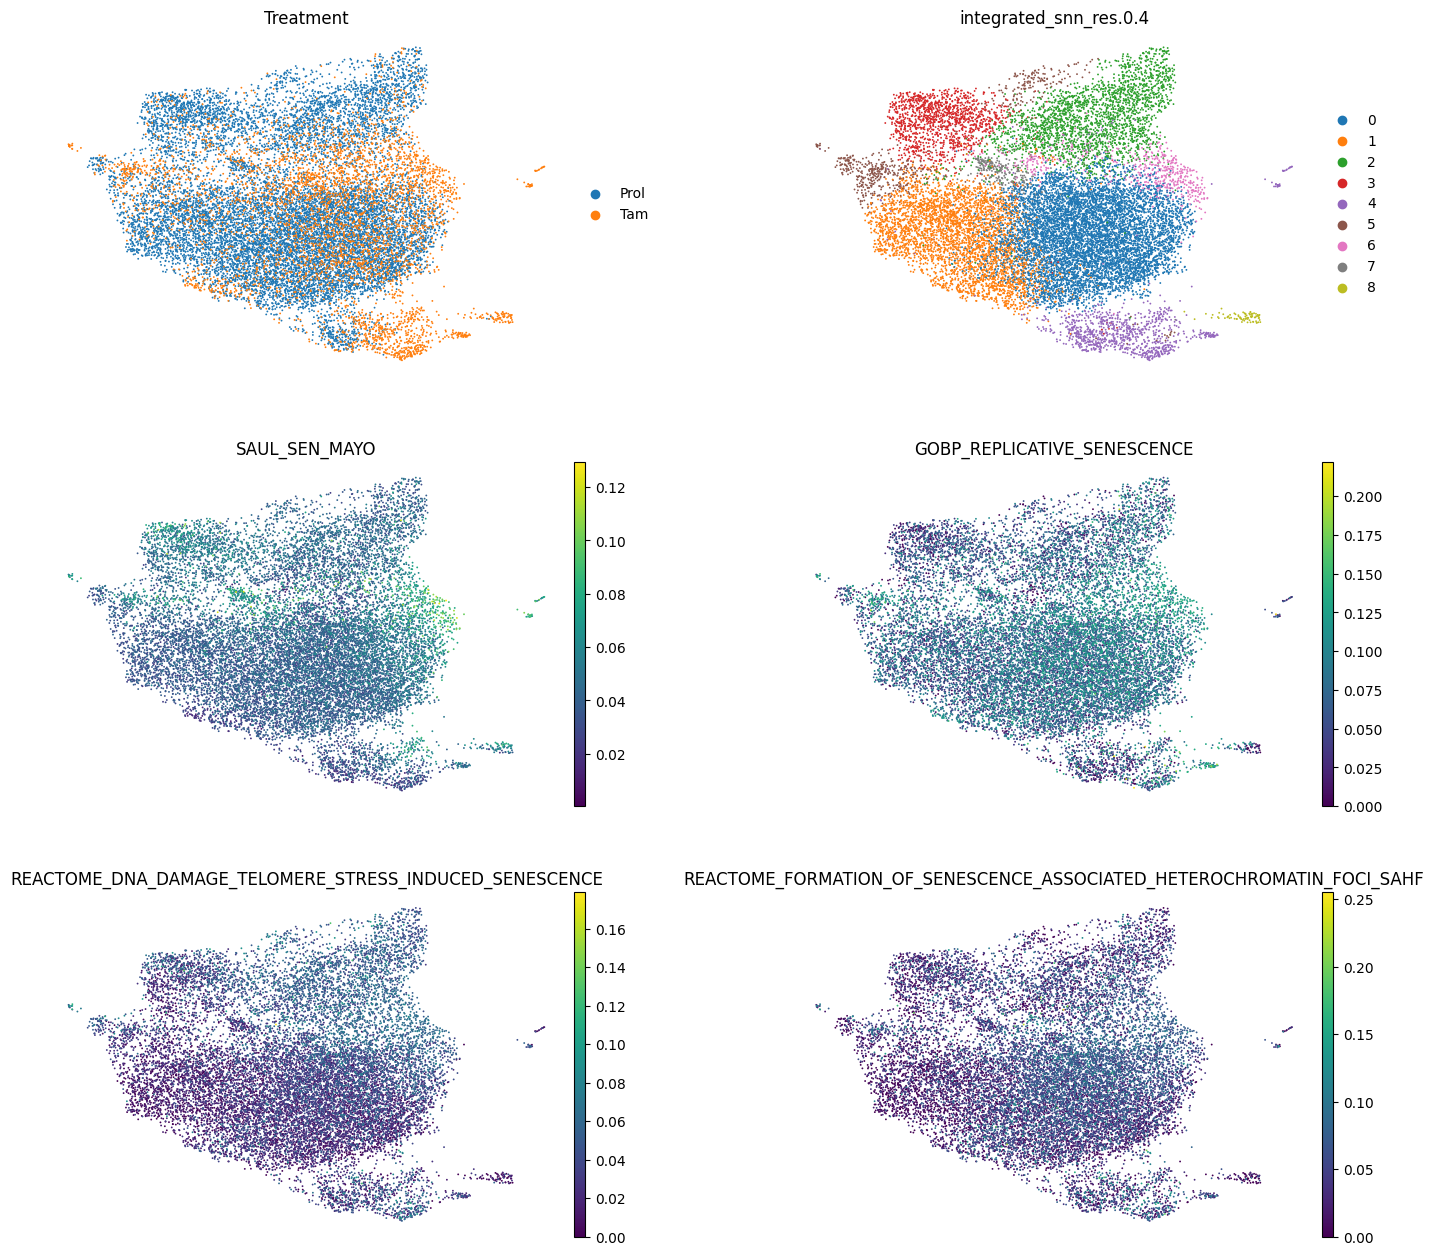

In [7]:
sc.pl.umap(
    adata,
    color=["Treatment", "integrated_snn_res.0.4"] + sen_pathways,
    frameon=False,
    ncols=2,
    wspace=0.3,
)

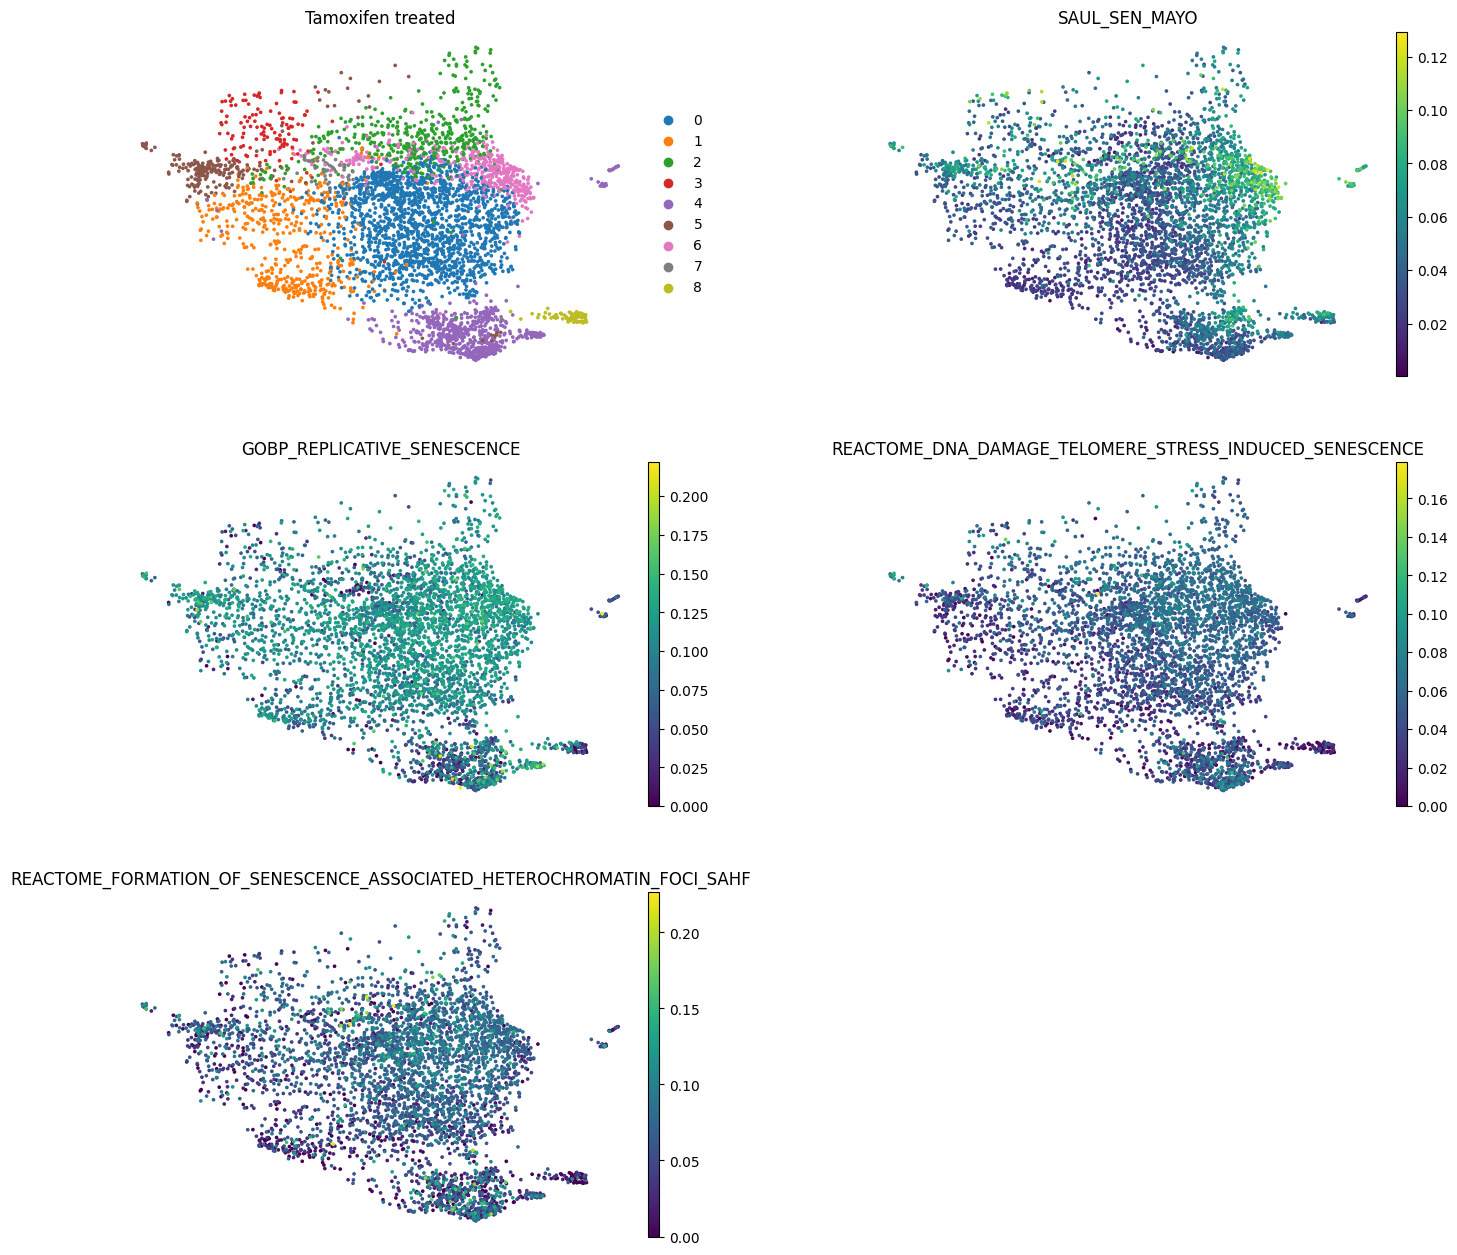

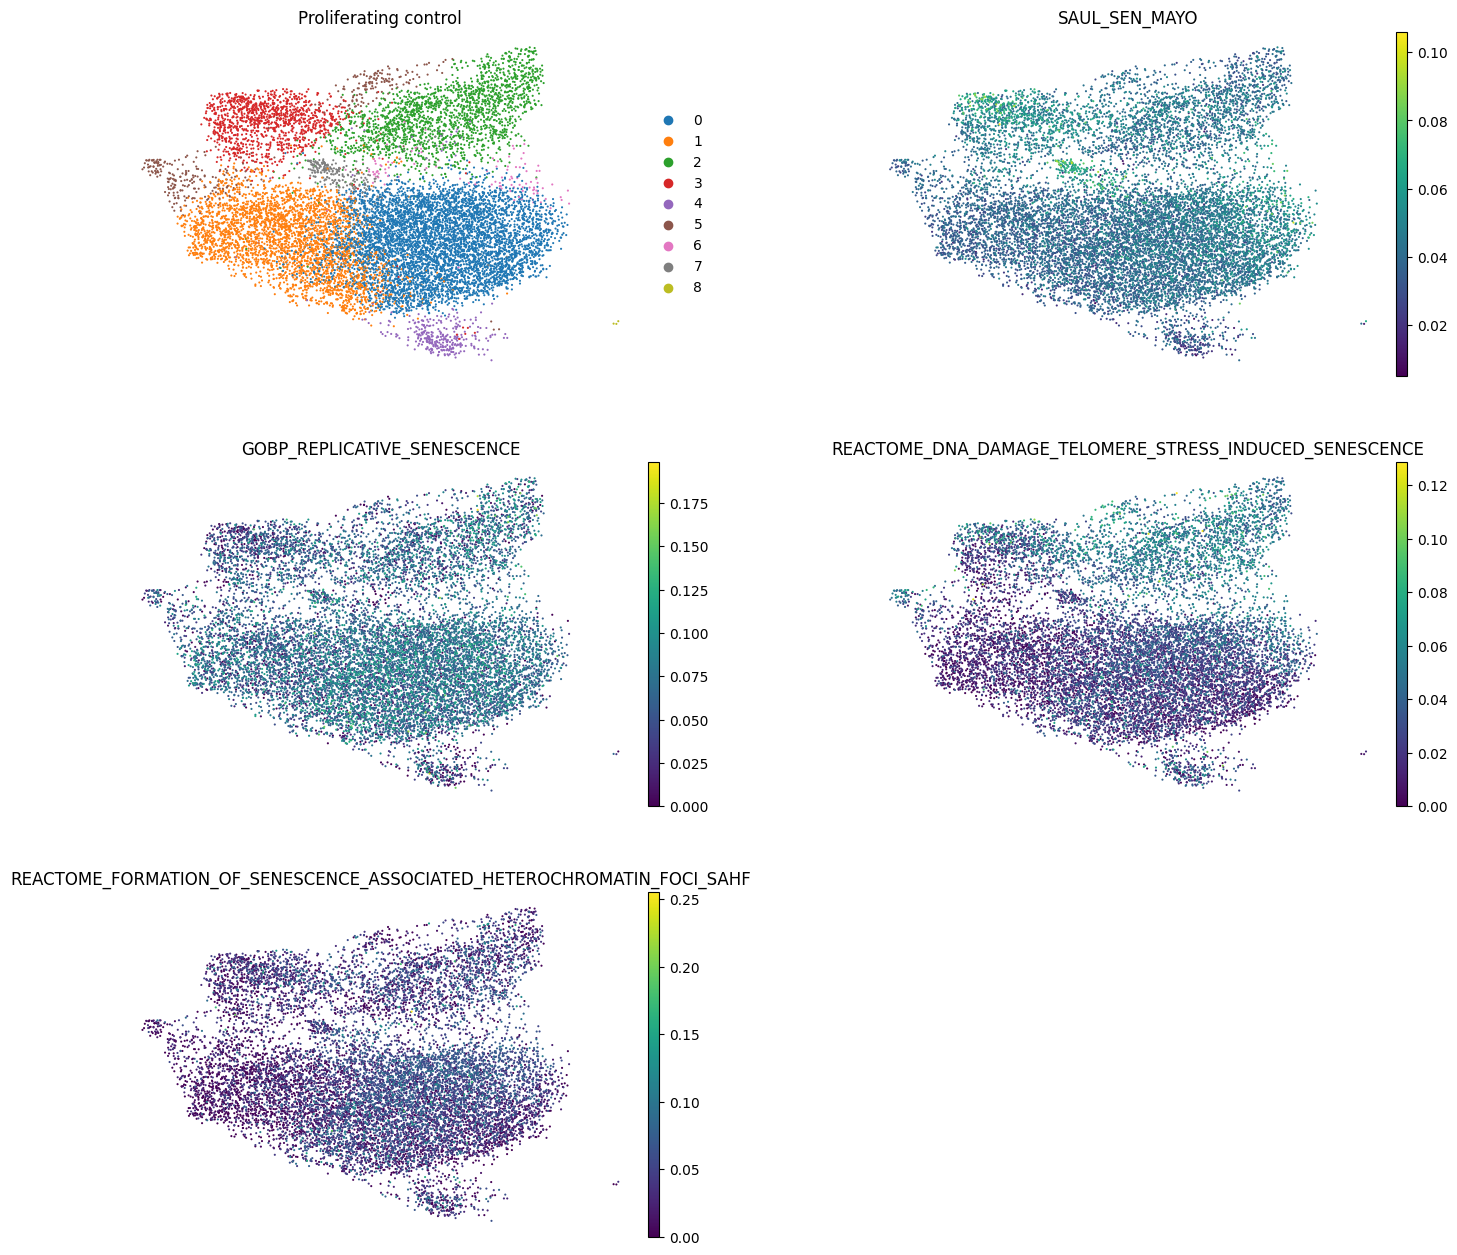

In [18]:
sc.pl.umap(
    adata_tamxoifen,
    color=["integrated_snn_res.0.4"] + sen_pathways,
    frameon=False,
    ncols=2,
    wspace=0.3,
    title="Tamoxifen treated"
)
sc.pl.umap(
    adata_control,
    color=["integrated_snn_res.0.4"] + sen_pathways,
    frameon=False,
    ncols=2,
    wspace=0.3,
    title="Proliferating control"
)

#### Heatmaps of geneset scores/methods to get senescence transcriptomic signatures

In [37]:
# group adata obs by cell cluster (integrated_snn_res.0.4) and get mean value of scores of sen_pathways
sen_tam_scores_mean = adata_tamxoifen.obs.groupby("integrated_snn_res.0.4")[sen_pathways].mean()
sen_prol_scores_mean = adata_control.obs.groupby("integrated_snn_res.0.4")[sen_pathways].mean()
display(sen_tam_scores_mean)
display(sen_prol_scores_mean)



/tmp/ipykernel_182033/1493516911.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sen_tam_scores_mean = adata_tamxoifen.obs.groupby("integrated_snn_res.0.4")[sen_pathways].mean()
/tmp/ipykernel_182033/1493516911.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sen_prol_scores_mean = adata_control.obs.groupby("integrated_snn_res.0.4")[sen_pathways].mean()


SAUL_SEN_MAYO  GOBP_REPLICATIVE_SENESCENCE  \
integrated_snn_res.0.4                                               
0                            0.039224                     0.102960   
1                            0.032768                     0.093251   
2                            0.044820                     0.103717   
3                            0.052288                     0.081795   
4                            0.040627                     0.066945   
5                            0.054689                     0.103152   
6                            0.074129                     0.103264   
7                            0.074556                     0.114457   
8                            0.054013                     0.056072   

                        REACTOME_DNA_DAMAGE_TELOMERE_STRESS_INDUCED_SENESCENCE  \
integrated_snn_res.0.4                                                           
0                                                                0.047180        
1                                                                0.033991        
2                                                                0.059700        
3                                                                0.051650        
4                                                                0.037481        
5                                                                0.040124        
6                                                                0.056836        
7                                                                0.048690        
8                                                                0.012102        

                        REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HETEROCHROMATIN_FOCI_SAHF  
integrated_snn_res.0.4                                                                         
0                                                                0.064169                      
1                                                                0.043993                      
2                                                                0.068350                      
3                                                                0.056086                      
4                                                                0.051197                      
5                                                                0.059752                      
6                                                                0.071563                      
7                                                                0.061191                      
8                                                                0.017041

SAUL_SEN_MAYO  GOBP_REPLICATIVE_SENESCENCE  \
integrated_snn_res.0.4                                               
0                            0.041546                     0.065581   
1                            0.036192                     0.058760   
2                            0.042245                     0.061940   
3                            0.050451                     0.047368   
4                            0.030892                     0.038371   
5                            0.039769                     0.049554   
6                            0.050310                     0.052376   
7                            0.060260                     0.063092   
8                            0.040579                     0.032294   

                        REACTOME_DNA_DAMAGE_TELOMERE_STRESS_INDUCED_SENESCENCE  \
integrated_snn_res.0.4                                                           
0                                                                0.023390        
1                                                                0.015965        
2                                                                0.048442        
3                                                                0.032376        
4                                                                0.028656        
5                                                                0.039814        
6                                                                0.046545        
7                                                                0.024904        
8                                                                0.009963        

                        REACTOME_FORMATION_OF_SENESCENCE_ASSOCIATED_HETEROCHROMATIN_FOCI_SAHF  
integrated_snn_res.0.4                                                                         
0                                                                0.042773                      
1                                                                0.025738                      
2                                                                0.039428                      
3                                                                0.032597                      
4                                                                0.037527                      
5                                                                0.023850                      
6                                                                0.062228                      
7                                                                0.044445                      
8                                                                0.013183

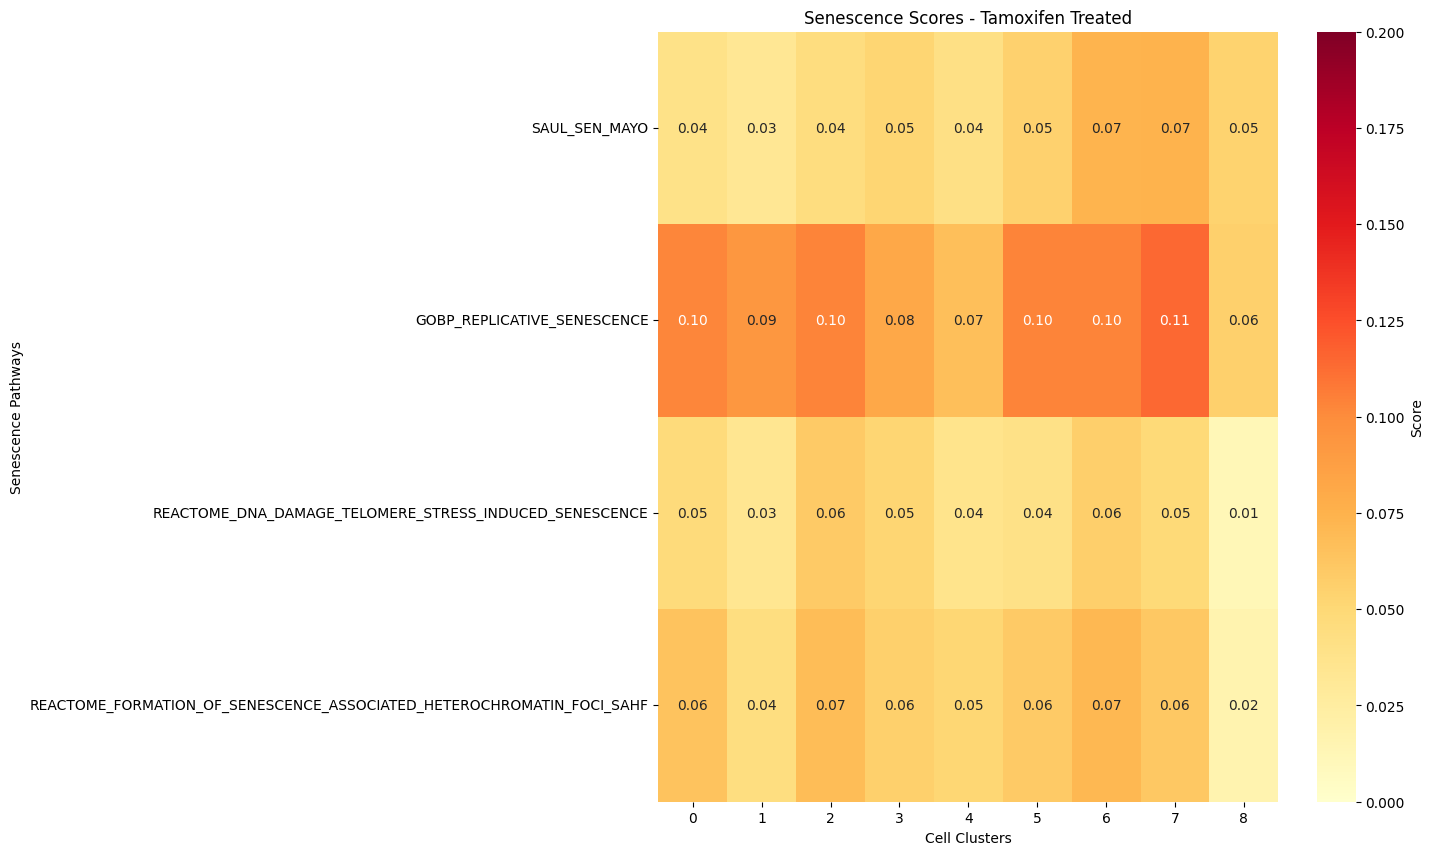

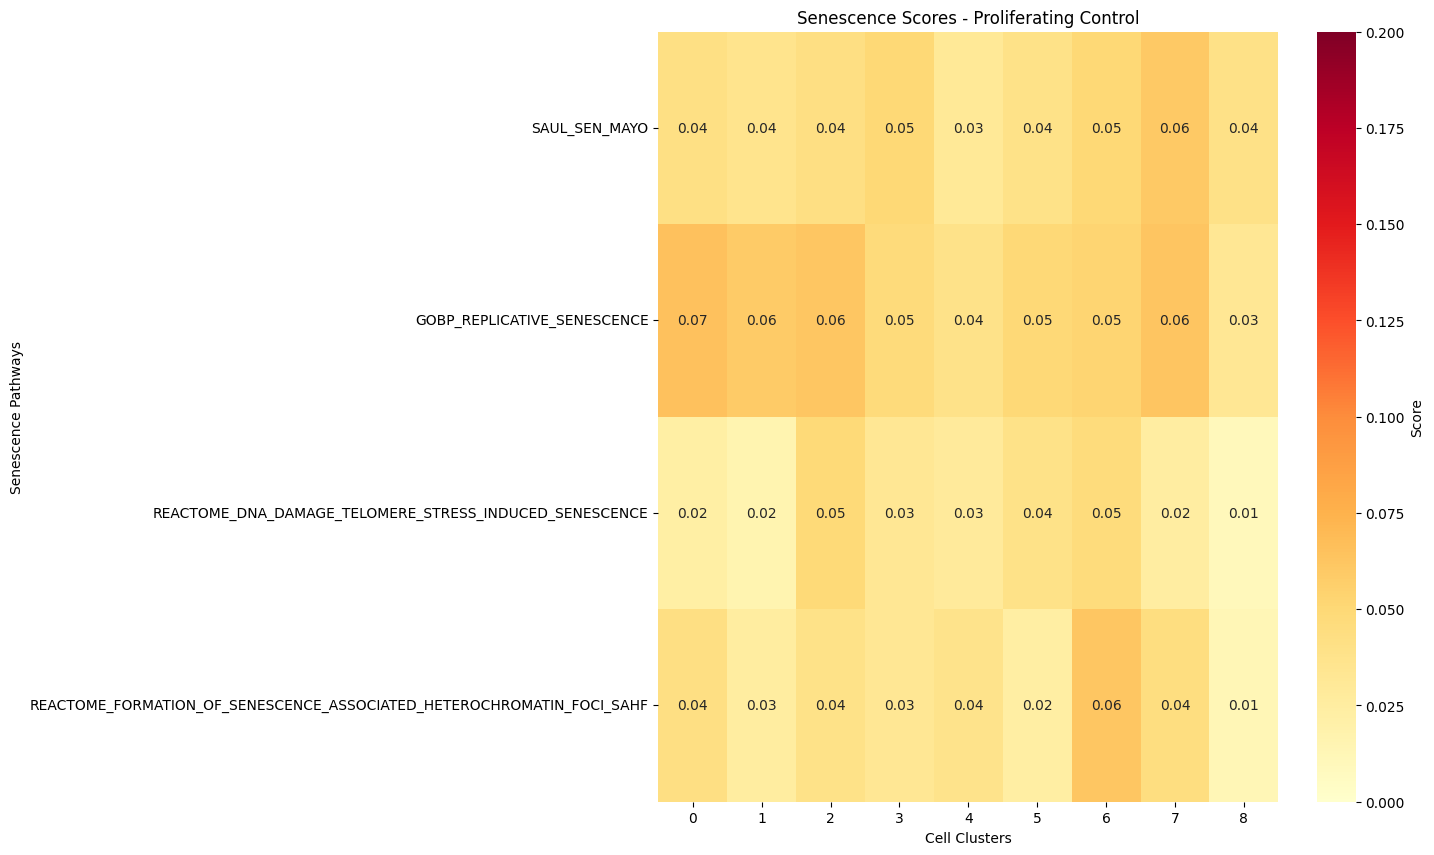

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for tamoxifen treated cells
plt.figure(figsize=(10, 10))
sns.heatmap(sen_tam_scores_mean.T,
            cmap='YlOrRd',  # Changed to YlOrRd colormap
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Score'},
            xticklabels=True,
            yticklabels=True,
            vmin=0,  # Set minimum value for consistent scale
            vmax=0.2)  # Set maximum value for consistent scale
plt.title('Senescence Scores - Tamoxifen Treated')
plt.xlabel('Cell Clusters')
plt.ylabel('Senescence Pathways')
plt.show()

# Plot heatmap for proliferating control cells
plt.figure(figsize=(10, 10))
sns.heatmap(sen_prol_scores_mean.T,
            cmap='YlOrRd',  # Changed to YlOrRd colormap
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Score'},
            xticklabels=True,
            yticklabels=True,
            vmin=0,  # Set minimum value for consistent scale
            vmax=0.2)  # Set maximum value for consistent scale
plt.title('Senescence Scores - Proliferating Control')
plt.xlabel('Cell Clusters')
plt.ylabel('Senescence Pathways')
plt.show()

#### Heatmap of gene expression of custom gene list

In [8]:
# custom geneset from NIA (human fibroblasts)
NIA_sen_genes = [
    "CKS2",
    "CCNB1",
    "PTTG1", 
    "QSOX1",
    "PARP1",
    "LBR",
    "LMNB1",
    "UQCR11",
    "NDUFA1", 
    "NDUFA3",
    "COX6B1",
    "CST3",
    "TGFB1",
    "PALLD",
    "CCND1",
    "IGFBP7",
    "SSRP1",
    "ANP32B",
    "PINK1",
    "BCL2L2"
]
# convert to mouse genes using gtf files of both species and ortholog information file
ortholog_info = pd.read_csv('/ix/djishnu/Akanksha/datasets/gene_sets/human_mouse_1to1_orthologs.csv')
ortholog_info


human   mouse
0        A1BG    A1bg
1        A1CF    A1cf
2       A2LD1   A2ld1
3         A2M     A2m
4      A4GALT  A4galt
...       ...     ...
15542  ZYG11A  Zyg11a
15543  ZYG11B  Zyg11b
15544     ZYX     Zyx
15545   ZZEF1   Zzef1
15546    ZZZ3    Zzz3

[15547 rows x 2 columns]

In [15]:
# search for the human genes in the ortholog df and return the mouse orthologs
mouse_NIA_sen_genes = ortholog_info[ortholog_info['human'].isin(NIA_sen_genes)]['mouse'].tolist()
display(mouse_NIA_sen_genes)

# display the human genes not in the ortholog df
human_NIA_sen_genes_not_in_ortholog = set(NIA_sen_genes) - set(ortholog_info['human'])
display(human_NIA_sen_genes_not_in_ortholog)

# append curated genes to the mouse_NIA_sen_genes list
ortholog_genes_mouse = ['Anp32b','Palld', 'Pttg1']
mouse_NIA_sen_genes = mouse_NIA_sen_genes + ortholog_genes_mouse
display(mouse_NIA_sen_genes)



['Bcl2l2',
 'Ccnb1',
 'Ccnd1',
 'Cks2',
 'Cox6b1',
 'Cst3',
 'Igfbp7',
 'Lbr',
 'Lmnb1',
 'Ndufa1',
 'Ndufa3',
 'Parp1',
 'Pink1',
 'Qsox1',
 'Ssrp1',
 'Tgfb1',
 'Uqcr11']

{'ANP32B', 'PALLD', 'PTTG1'}

['Bcl2l2',
 'Ccnb1',
 'Ccnd1',
 'Cks2',
 'Cox6b1',
 'Cst3',
 'Igfbp7',
 'Lbr',
 'Lmnb1',
 'Ndufa1',
 'Ndufa3',
 'Parp1',
 'Pink1',
 'Qsox1',
 'Ssrp1',
 'Tgfb1',
 'Uqcr11',
 'Anp32b',
 'Palld',
 'Pttg1']

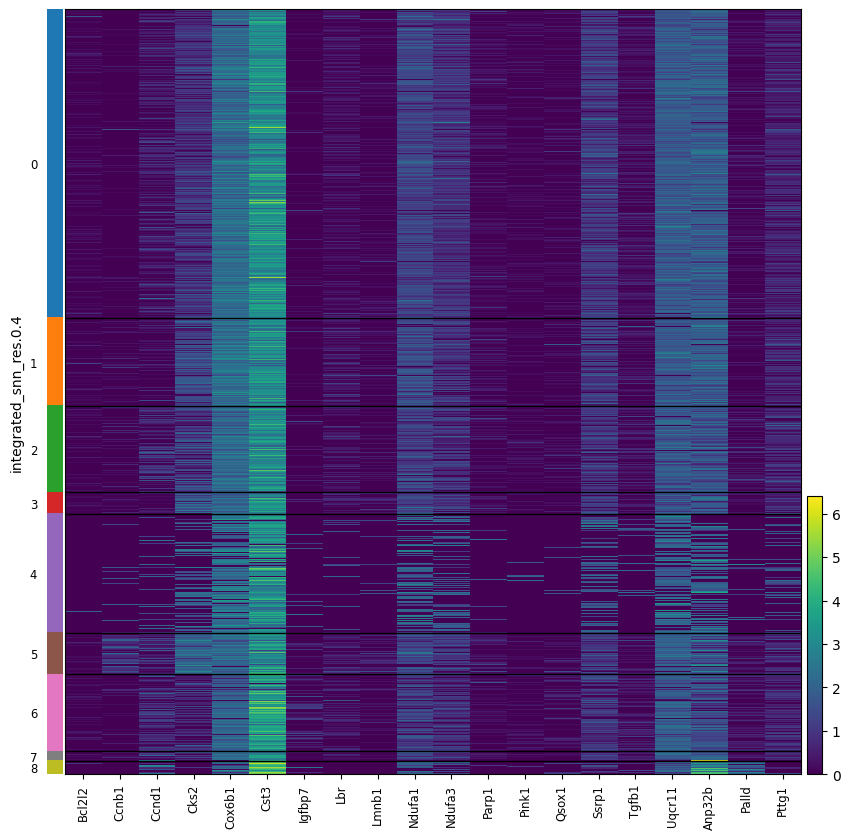

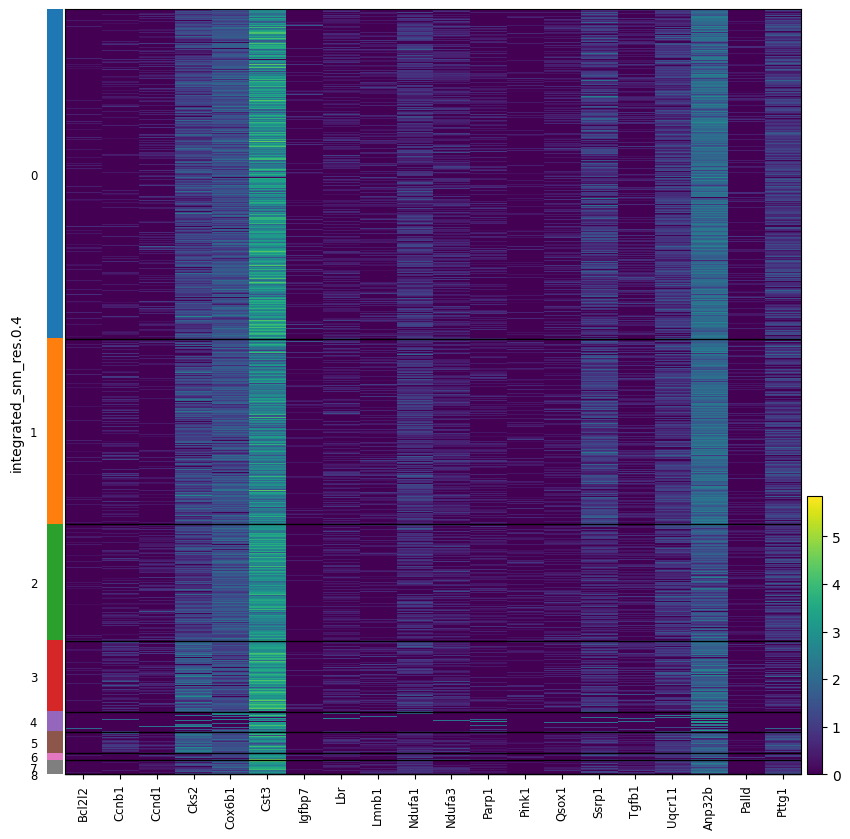

In [20]:
# scanpy heatmap of the mouse NIA senescence genes for both treated and control adata
sc.pl.heatmap(adata_tamxoifen, var_names = mouse_NIA_sen_genes, groupby = 'integrated_snn_res.0.4', figsize = (10,10))
sc.pl.heatmap(adata_control, var_names = mouse_NIA_sen_genes, groupby = 'integrated_snn_res.0.4', figsize = (10,10))


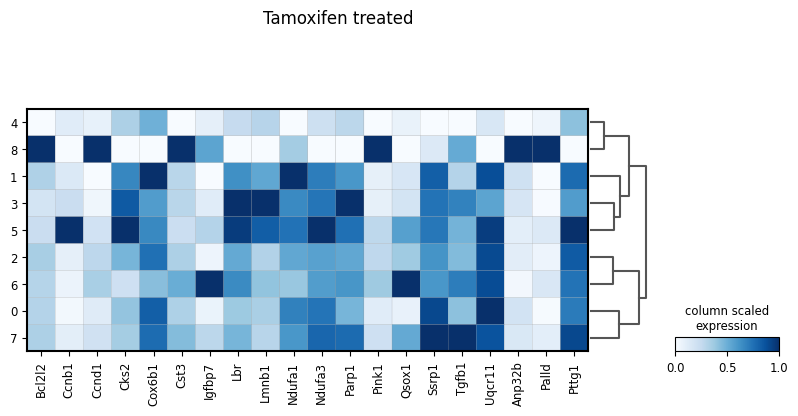

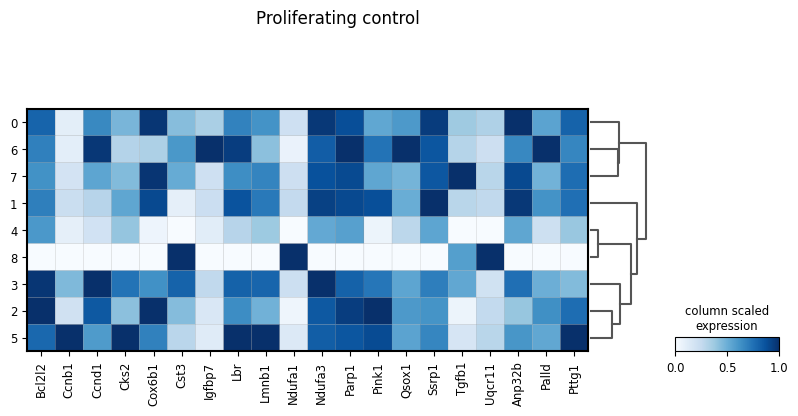

In [32]:
sc.pl.matrixplot(
    adata_tamxoifen,
    mouse_NIA_sen_genes,
    "integrated_snn_res.0.4",
    dendrogram=True,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    title = "Tamoxifen treated"
    #return_fig = True
)
#mp_tam.add_totals().style(edge_color='black').show()
sc.pl.matrixplot(
    adata_control,
    mouse_NIA_sen_genes,
    "integrated_snn_res.0.4",
    dendrogram=True,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    title = "Proliferating control"
    #return_fig = True
)
#mp_prol.add_totals().style(edge_color='black').show()


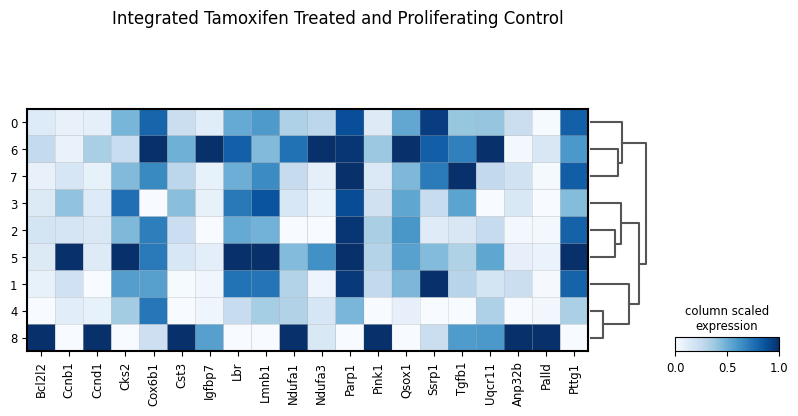

In [31]:
# plot matrix plot for all cells
sc.pl.matrixplot(adata, mouse_NIA_sen_genes, "integrated_snn_res.0.4", dendrogram=True, cmap="Blues", standard_scale="var", colorbar_title="column scaled\nexpression", title = "Integrated Tamoxifen Treated and Proliferating Control")
#mp_all.add_totals().style(edge_color='black').show()

#### Violin plots to compare senescence scores between treated and control

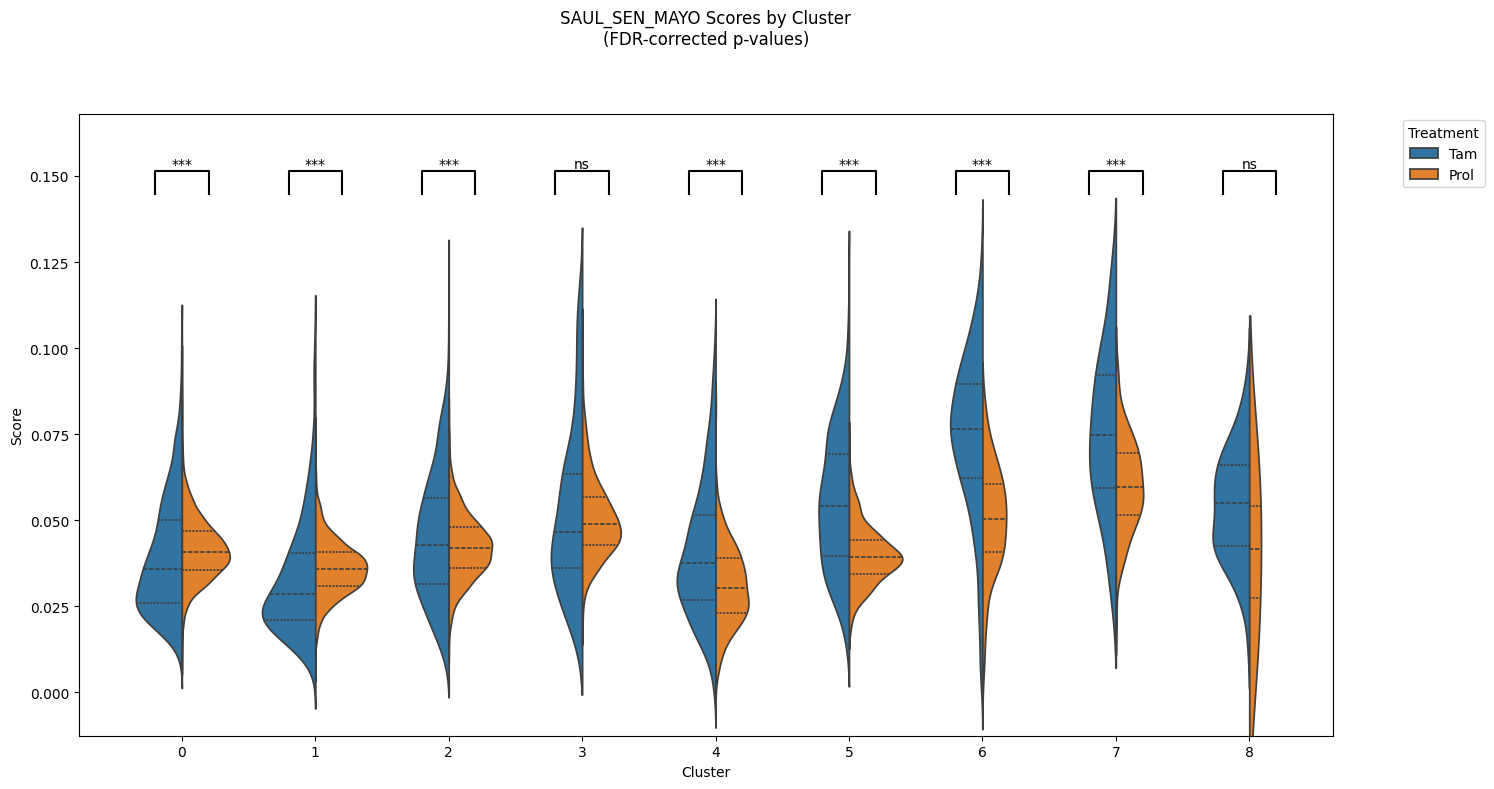

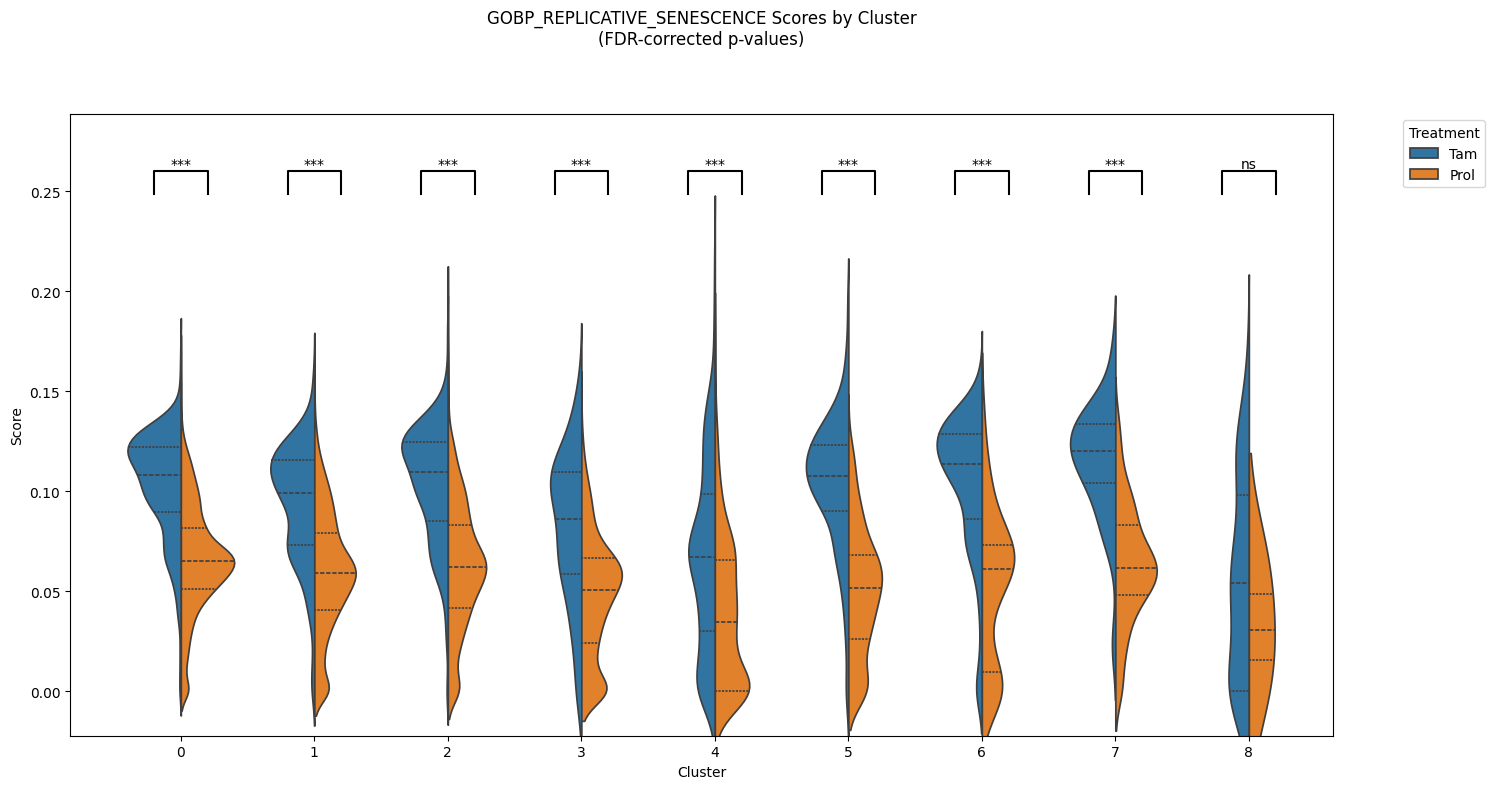

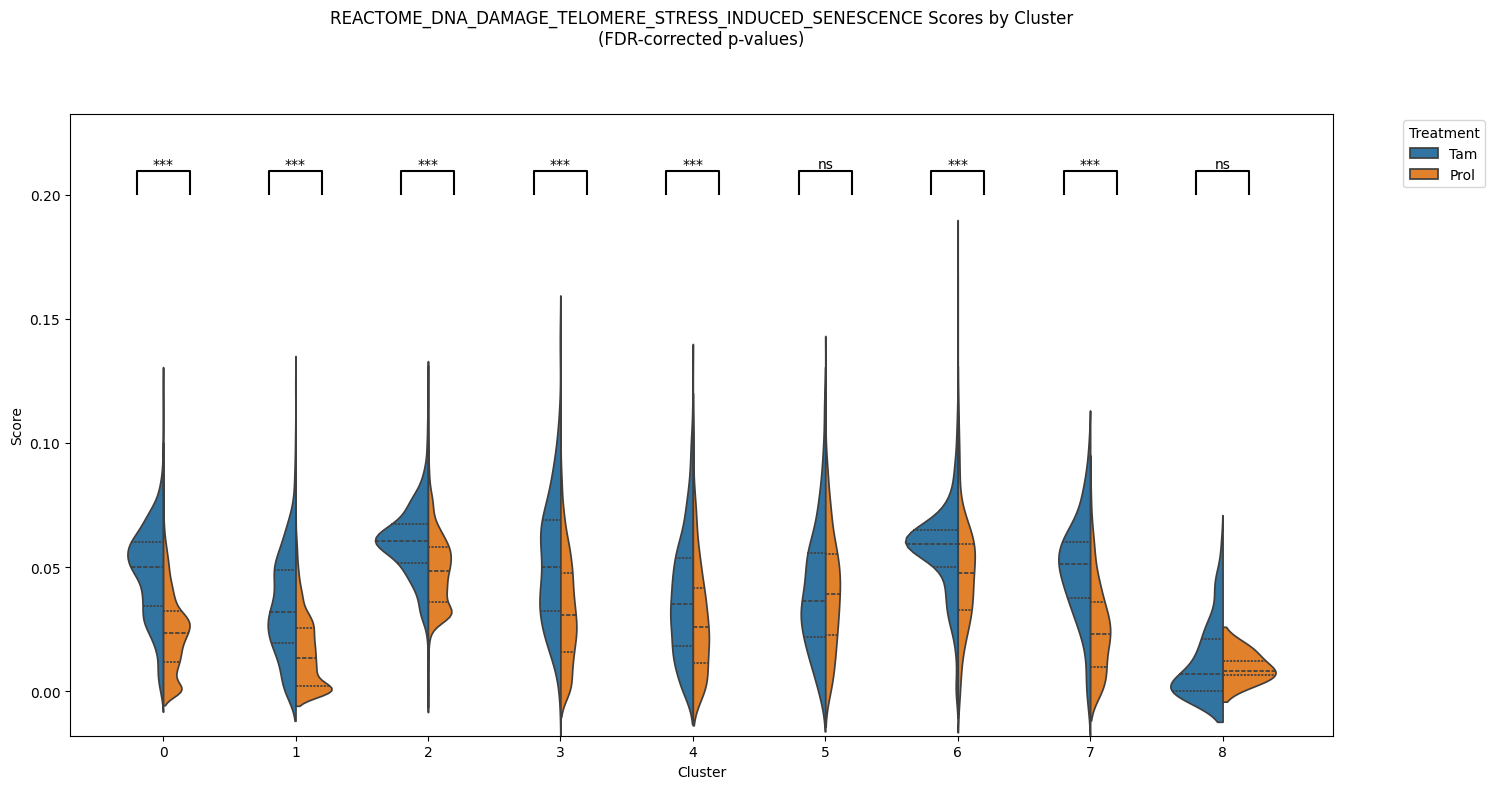

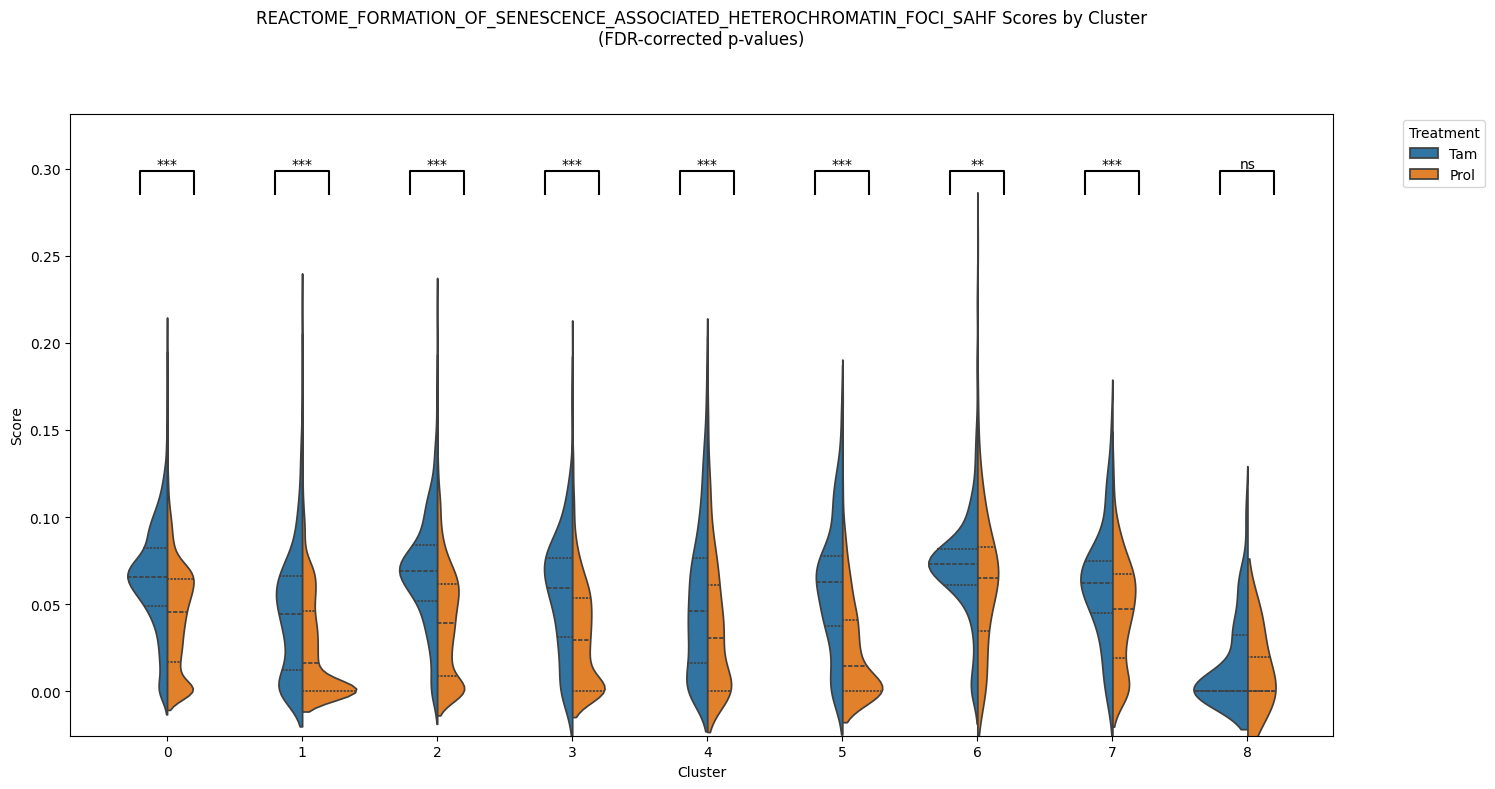

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.multitest import multipletests

def add_stat_annotation(x1, x2, y, h, p_adj):
    """Add significance annotation to plot"""
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    if p_adj < 0.001:
        stars = '***'
    elif p_adj < 0.01:
        stars = '**'
    elif p_adj < 0.05:
        stars = '*'
    else:
        stars = 'ns'
    plt.text((x1+x2)*.5, y+h, stars, ha='center', va='bottom')

# Plot each pathway separately
for pathway in sen_pathways:
    # Get data for tamoxifen and proliferating cells
    tam_data = adata_tamxoifen.obs[[pathway, 'integrated_snn_res.0.4']].assign(Treatment='Tam')
    prol_data = adata_control.obs[[pathway, 'integrated_snn_res.0.4']].assign(Treatment='Prol')
    
    # Combine the data
    plot_data = pd.concat([tam_data, prol_data])
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    plt.subplots_adjust(top=0.85)
    
    # Create violin plot
    sns.violinplot(data=plot_data, 
                  x='integrated_snn_res.0.4',  
                  y=pathway,                   
                  hue='Treatment',             
                  split=True,
                  inner='quartile')
    
    # Prepare for statistical testing
    clusters = sorted(plot_data['integrated_snn_res.0.4'].unique())
    max_y = plot_data[pathway].max()
    min_y = plot_data[pathway].min()
    y_range = max_y - min_y
    spacing = y_range * 0.1
    
    # Collect all p-values first
    p_values = []
    cluster_pairs = []
    
    for cluster in clusters:
        cluster_tam = tam_data[tam_data['integrated_snn_res.0.4'] == cluster][pathway]
        cluster_prol = prol_data[prol_data['integrated_snn_res.0.4'] == cluster][pathway]
        
        # Perform t-test
        stat, p_val = stats.ttest_ind(cluster_tam, cluster_prol)
        p_values.append(p_val)
        cluster_pairs.append((cluster_tam, cluster_prol))
    
    # Correct for multiple testing using Benjamini-Hochberg method
    rejected, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')
    
    # Add annotations with adjusted p-values
    for idx, (p_adj, cluster) in enumerate(zip(p_adjusted, clusters)):
        y_pos = max_y + spacing * (1.2)
        add_stat_annotation(idx-0.2, idx+0.2, y_pos, spacing*0.5, p_adj)
    
    # Customize the plot
    plt.title(f'{pathway} Scores by Cluster\n(FDR-corrected p-values)', pad=50)
    plt.xlabel('Cluster')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    
    # Adjust y-axis limits
    plt.ylim(min_y - (y_range * 0.1), max_y + (spacing * 3))
    
    # Add legend
    plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# load adata with SID
adata_with_SID = sc.read('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/tamoxifen_with_SID.h5ad')
adata_with_SID


In [ ]:
# load pred_dict from pickle file
import pickle
with open('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/tam_SenCID_pred_dict.pkl', 'rb') as f:
    pred_dict = pickle.load(f)
pred_dict


In [ ]:
markers = ['rec_SID1', 'rec_SID2', 'rec_SID3', 'rec_SID4', 'rec_SID5', 'rec_SID6']
sc.pl.violin(adata_with_SID, keys = markers)

In [ ]:
adata.obs['SID3_Score'] = pred_dict['SID3'].loc[adata.obs_names, 'SID_Score']
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID3_Score'], color_map = 'viridis', vmax = 0.5)


In [ ]:
adata.obs['SID5_Score'] = pred_dict['SID5'].loc[adata.obs_names, 'SID_Score']
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID5_Score'], color_map = 'viridis')


In [ ]:
adata.obs['SID1_Score'] = pred_dict['SID1'].loc[adata.obs_names, 'SID_Score']
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID1_Score'], color_map = 'viridis')


In [ ]:
adata.obs['SID2_Score'] = pred_dict['SID2'].loc[adata.obs_names, 'SID_Score']
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID2_Score'], color_map = 'viridis')



In [ ]:
adata.obs['SID4_Score'] = pred_dict['SID4'].loc[adata.obs_names, 'SID_Score']
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID4_Score'], color_map = 'viridis')


In [ ]:
adata.obs['SID6_Score'] = pred_dict['SID6'].loc[adata.obs_names, 'SID_Score']
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID6_Score'], color_map = 'viridis')
